In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# importing assignment dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Question 0

Question 0 (Example)
How many features does the breast cancer dataset have?

This function should return an integer.

In [5]:
# these are the predictive attributes?
len(cancer["feature_names"])

30

# Question 1

In [6]:
columns = list(cancer["feature_names"])
#columns.append("target")
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [7]:
# creating dataframe
df = pd.DataFrame(data=cancer["data"], columns=columns, index=range(0,569,1))
# parsing the missing columns from the cancer frame
df["target"] = cancer["target"]
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

# Question 2

In [8]:
q2 = df.groupby("target").agg({"target":"count"})
q2.index = ["malignant", "benign"]
q2 = q2["target"]

# Question 3

In [9]:
X = df.drop("target", axis=1)
y = df["target"]

# Question 4

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Question 5

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# creates the classifier object
    # setting K to 1
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Question 6

In [12]:
# generating relevant data
data = X.apply(np.mean)

# reshaping data to use it on predict
    # passing sample data as array
data = np.array(data)
    # reshaping as a single sample
data = data.reshape(1,-1)
data

array([[1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
        9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
        1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
        2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
        3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
        1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
        1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
        2.90075571e-01, 8.39458172e-02]])

In [13]:
clf.predict(data)

array([1])

# Question 7

In [14]:
clf.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

# Question 8

In [15]:
clf.score(X_test, y_test)

0.916083916083916

### Bonus 1 -> Testing accuracy for multiple KNN

(0.8, 1.0)

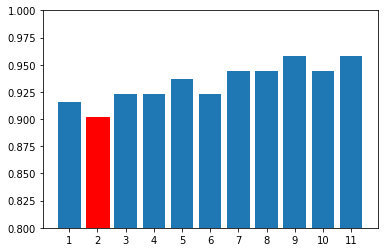

In [16]:
accuracy = []
for k in range(1,12):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test, y_test))

ax=plt.bar(list(range(1,12)), accuracy)
ax[1].set_color("red")
plt.xticks(list(range(1,12)))
plt.ylim(0.8, 1)